In [1]:
import geopandas as gpd

In [2]:
table_file = 'a0000000a.gdbtable'
df = gpd.read_file(table_file, crs='epsg:4326')

In [3]:
df.head()

,ref_no,name,pointx_class,groupname,categoryname,classname,feature_easting,feature_northing,pos_accuracy,uprn,...,postcode,admin_boundary,telephone_number,url,brand,qualifier_type,qualifier_data,provenance,supply_date,geometry
0,21864924,Bus Stop (Grove Farm Cottages),10590732,Transport,Bus Transport,Bus Stops,559498.0,184352.0,1,NaN,...,RM15,Thurrock,NaN,NaN,NaN,SMS Number,thuagwd,Department for Transport,2022-06-01T00:00:00,POINT (559498.000 184352.000)
1,20279522,Moat,03170245,Attractions,Historical and Cultural,Historic and Ceremonial Structures,531404.0,196330.0,2,NaN,...,EN2,Enfield London Boro,NaN,NaN,NaN,NaN,NaN,Ordnance Survey,2022-06-01T00:00:00,POINT (531404.000 196330.000)
2,20279821,Moat,03170245,Attractions,Historical and Cultural,Historic and Ceremonial Structures,524417.0,197646.0,2,NaN,...,EN5,Barnet London Boro,NaN,NaN,NaN,NaN,NaN,Ordnance Survey,2022-06-01T00:00:00,POINT (524417.000 197646.000)
3,20279822,Moat,03170245,Attractions,Historical and Cultural,Historic and Ceremonial Structures,525419.0,189921.0,2,NaN,...,N3,Barnet London Boro,NaN,NaN,NaN,NaN,NaN,Ordnance Survey,2022-06-01T00:00:00,POINT (525419.000 189921.000)
4,21859718,Bus Stop (Albion Terrace),10590732,Transport,Bus Transport,Bus Stops,537731.0,196190.0,1,NaN,...,E4,Epping Forest District,NaN,NaN,NaN,SMS Number,esxdgtdm,Department for Transport,2022-06-01T00:00:00,POINT (537731.000 196190.000)


In [4]:
groupname = df['groupname'].unique().tolist()
groupname

['Transport',
 'Attractions',
 'Education and Health',
 'Commercial Services',
 'Public Infrastructure',
 'Accommodation, Eating and Drinking',
 'Manufacturing and Production',
 'Retail',
 'Sport and Entertainment']

In [29]:
# Filter groupname by Sport and Entertainment

df_ls = df.loc[df['groupname'] == 'Retail']

In [30]:
df_ls.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 43781 entries, 39068 to 338703
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ref_no             43781 non-null  int64   
 1   name               43781 non-null  object  
 2   pointx_class       43781 non-null  object  
 3   groupname          43781 non-null  object  
 4   categoryname       43781 non-null  object  
 5   classname          43781 non-null  object  
 6   feature_easting    43781 non-null  float64 
 7   feature_northing   43781 non-null  float64 
 8   pos_accuracy       43781 non-null  int64   
 9   uprn               41614 non-null  object  
 10  topo_toid          43781 non-null  object  
 11  topo_toid_version  43781 non-null  int64   
 12  usrn               43781 non-null  object  
 13  usrn_mi            43781 non-null  int64   
 14  distance           43781 non-null  float64 
 15  address_detail     43369 non-null  objec

In [31]:
# pick the columns that we need
df_pick = df_ls.loc[:,['name','groupname','categoryname','classname','feature_easting','feature_northing','admin_boundary','geometry']]
df_pick.columns

Index(['name', 'groupname', 'categoryname', 'classname', 'feature_easting',
       'feature_northing', 'admin_boundary', 'geometry'],
      dtype='object')

In [32]:
df_pick

,name,groupname,categoryname,classname,feature_easting,feature_northing,admin_boundary,geometry
39068,Central Furniture,Retail,"Household, Office, Leisure and Garden",Secondhand Goods,538561.0,165916.0,Bromley London Boro,POINT (538561.000 165916.000)
39762,Whittard of Chelsea,Retail,"Food, Drink and Multi Item Retail",Tea and Coffee Merchants,517977.2,169439.8,Kingston upon Thames London Boro,POINT (517977.200 169439.800)
39938,Belle Epoque Patisserie,Retail,"Food, Drink and Multi Item Retail",Bakeries,532882.0,185437.0,Hackney London Boro,POINT (532882.000 185437.000)
40247,Daniels Bagel Bakery Ltd,Retail,"Food, Drink and Multi Item Retail",Bakeries,524791.7,188953.4,Barnet London Boro,POINT (524791.700 188953.400)
40416,Kensington Court Cafe Ltd,Retail,"Food, Drink and Multi Item Retail",Bakeries,525798.0,179521.0,Kensington and Chelsea London Boro,POINT (525798.000 179521.000)
...,...,...,...,...,...,...,...,...
338684,Roehampton Local,Retail,"Food, Drink and Multi Item Retail",Convenience Stores and Independent Supermarkets,522471.0,173877.0,Wandsworth London Boro,POINT (522471.000 173877.000)
338693,Limpopo Biltong,Retail,"Food, Drink and Multi Item Retail","Grocers, Farm Shops and Pick Your Own",516363.0,173297.0,Richmond upon Thames London Boro,POINT (516363.000 173297.000)
338694,Gail's Artisan Bakery,Retail,"Food, Drink and Multi Item Retail",Bakeries,516321.0,173273.0,Richmond upon Thames London Boro,POINT (516321.000 173273.000)
338701,Khalpey's,Retail,"Food, Drink and Multi Item Retail","Grocers, Farm Shops and Pick Your Own",531353.0,161670.0,Croydon London Boro,POINT (531353.000 161670.000)


In [33]:
categoryname = df_pick['categoryname'].unique().tolist()
categoryname

['Household, Office, Leisure and Garden',
 'Food, Drink and Multi Item Retail',
 'Clothing and Accessories',
 'Motoring']

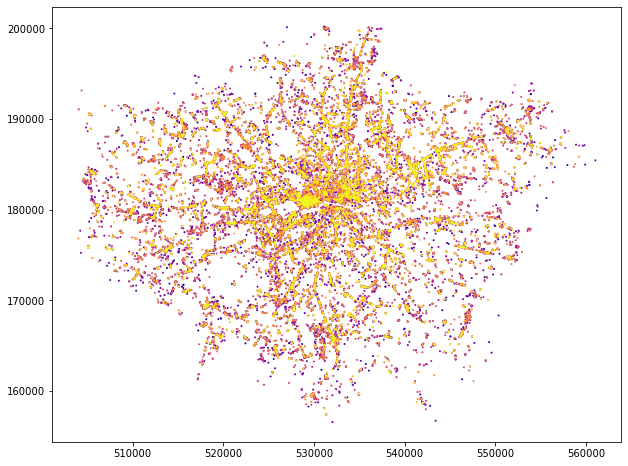

In [35]:
df_pick.to_crs('epsg:27700').plot(cmap='plasma', markersize=1, figsize=(12,8));